Demonstrate Pre processing (Data Cleaning, Integration and Transformation) activity 
on suitable data:
For example:
Identify and Delete Rows that Contain Duplicate Data by considering an appropriate 
dataset.
Identify and Delete Columns That Contain a Single Value by considering an 
appropriate dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
oil_data=pd.read_csv('oil-spill.csv', header=None)
print(oil_data.shape)

(937, 50)


### Unique Count

In [4]:
unique_count=oil_data.nunique()
unique_count

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

### Find which column has only single value and drop that column

In [4]:
to_del=[i for i, v in enumerate(unique_count) if v==1]
print(to_del)









[22]


In [5]:
oil_data.drop(to_del, axis=1, inplace=True)
print(oil_data.columns, oil_data.shape)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64') (937, 49)


### Find which row has duplicate values

In [6]:
True in list(oil_data.duplicated())

False

In [7]:
oil_data.shape

(937, 49)

In [8]:
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [9]:
data=oil_data.values

In [10]:
x=data[:, :-1]
y=data[:, -1]
print(x.shape, y.shape)

(937, 48) (937,)


In [11]:
threshold = np.arange(0.0, 0.55, 0.05)

In [12]:
res=list()
for t in threshold:
    trnsform=VarianceThreshold(threshold=t)
    x_sel=trnsform.fit_transform(x)
    n_features=x_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' %(t, n_features))
    res.append(n_features)

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


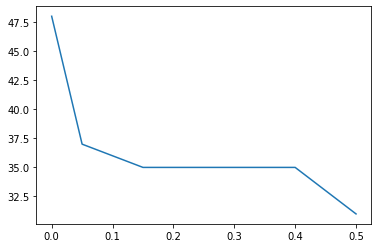

In [13]:
plt.plot(threshold, res)
plt.show()

### Check duplicate rows in Iris dataset

In [14]:
from sklearn.datasets import load_iris

In [15]:
iri = load_iris()

In [16]:
idi_df=pd.DataFrame(data=iri.data, columns=iri.feature_names)

In [17]:
idi_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
True in list(idi_df.duplicated(keep='first'))

True

In [19]:
idi_df.drop_duplicates(inplace=True)
idi_df.shape

(149, 4)

In [20]:
idi_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
